# Aqueduct risk widgets

In [47]:
from vega import Vega 
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
%matplotlib inline

In [128]:
import random

for i in range(1):
    print({"x":random.random()*16,"y":random.random()*5, "label":"country"},',')

{'x': 15.890662387997244, 'y': 0.48751305240983644, 'label': 'country'} ,


#### VegaConfig file

In [9]:
Config="""
{
    "range": {
      "category": ["#5079a5","#ef8e3b","#dd565c","#79b7b2","#5da052","#ecc853","#ad7aa1","#ef9ba7","#9b7461","#bab0ac"],
      "symbol":["square","circle"]
      }
}
"""

## Annual expected urban damage

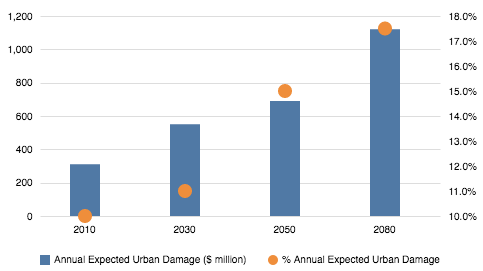

In [91]:
specV3=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 400,
  "height": 200,
  "padding": 5,

  "config": {
    "range": {
      "category": ["#5079a5","#ef8e3b","#dd565c","#79b7b2","#5da052","#ecc853","#ad7aa1","#ef9ba7","#9b7461","#bab0ac"],
      "symbol":["square","circle"]
      }
  },
  
  "data": [
    {
      "name": "table",
      "values": [
        {"year": "2010", "amount": 311, "percentage": 10},
        {"year": "2030", "amount": 550, "percentage": 11},
        {"year": "2050", "amount": 690, "percentage": 15},
        {"year": "2080", "amount": 1120, "percentage": 17.5}
      ]
    },
    {
      "name": "info",
      "values": [
        {"text": "Annual Expected Urban Damage ($ million)"}, 
        {"text": "% Annual Expected Urban Damage"}
      ]
    }
  ],

  "signals": [
    {
      "name": "tooltip1",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    },
    {
      "name": "tooltip2",
      "value": {},
      "on": [
        {"events": "symbol:mouseover", "update":"datum"},
        {"events": "symbol:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "year"},
      "range": {"step": 100},
      "paddingInner": 0.7,
      "paddingOuter": 0.3,
      "round": true
    },
    {
      "name": "yscale_amout",
      "domain": {"data": "table", "field": "amount"},
      "nice": true,
      "range": "height"
    },
    {
      "name": "yscale_per",
      "domain": {"data": "table", "field": "percentage"},
      "nice": true,
      "zero": false,
      "range": "height"
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "info","field": "text"},
      "range": "category"
    },
    {
      "name": "typeSymbol",
      "type": "ordinal",
      "range": "symbol",
      "domain": {"data": "info","field": "text"}
    }

  ],

  "axes": [
    { "orient": "bottom", "scale": "xscale", "domain": false, "ticks": false, "offset": 6},
    { "orient": "left", "scale": "yscale_amout", "domain": false, "ticks": false, "grid": true, "tickCount": 5, "offset": 6},
    { "orient": "right", "scale": "yscale_per", "domain": false, "ticks": false, "tickCount": 8, "offset": 6,
      "encode":{
        "labels":{
          "update":{
            "text":{"signal": "format(datum.value, '.1f') + '%'"}
          }
        }
      }
    }
  ],

  "legends": [
    {
      "fill":"color",
      "shape":"typeSymbol",
      "direction": "horizontal",
      "orient": "bottom",
      "offset": 20,
      "columnPadding":20,
      "labelLimit": 1000,
      "encode": {
        "symbols": {
          "update": {
            "strokeWidth": {"value": 0},
            "opacity": {"value": 1}
          }
        }
      }
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "year"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale_amout", "field": "amount"},
          "y2": {"scale": "yscale_amout", "value": 0}
        },
        "update": {
          "fill": {"value": "#5079a5"}
        },
        "hover": {
          "fill": {"value": "#79b7b2"}
        }
      }
    },
    {
      "type": "symbol",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "year", "band":0.5},
          "y": {"scale": "yscale_per", "field": "percentage"},
          "y2": {"scale": "yscale_per", "value": 0},
          "size": {"scale": "yscale_per", "value": 10}
        },
        "update": {
          "fill": {"value": "#ef8e3b"}
        },
        "hover": {
          "fill": {"value": "#dd565c"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip1.year", "band": 0.5},
          "y": {"scale": "yscale_amout", "signal": "tooltip1.amount", "offset": -2},
          "text": {"signal": "tooltip1.amount"},
          "fillOpacity": [
            {"test": "datum === tooltip1", "value": 0},
            {"value": 1}
          ]
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip2.year", "band": 0.5},
          "y": {"scale": "yscale_per", "signal": "tooltip2.percentage", "offset": -10},
          "text":{"signal": "tooltip2.percentage"},
          "fillOpacity": [
            {"test": "datum === tooltip2", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
}
""")
vega4view=dict(specV3)
#vega4view['config']=json.loads(Config)
#vega4view['width']=400
#vega4view['height']=200
Vega(vega4view)

## Annual expected urban damage by country

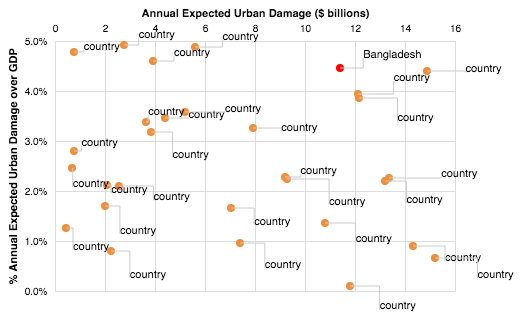

In [127]:
specV3=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 400,
  "height": 250,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {"x": 11.419791263051216, "y": 4.465964521421658,   "label": "Bangladesh"},
        {"x": 15.1938664582494,   "y": 0.6522617325557017,  "label": "country"},
        {"x": 12.109827430710999, "y": 3.933182156027579,   "label": "country"},
        {"x": 12.150300078187009, "y": 3.8646624572981967,  "label": "country"},
        {"x": 7.020171619478667,  "y": 1.668577973782146,   "label": "country"},
        {"x": 11.818590655888418, "y": 0.10687429209741861, "label": "country"},
        {"x": 5.206189614160598,  "y": 3.5816806911651033,  "label": "country"},
        {"x": 3.823492100452132,  "y": 3.179226290036656,   "label": "country"},
        {"x": 9.214108997081162,  "y": 2.2763218007398662,  "label": "country"},
        {"x": 5.600464024368147,  "y": 4.870386316820838,   "label": "country"},
        {"x": 13.190830762662795, "y": 2.2056711726340246,  "label": "country"},
        {"x": 7.911708060970502,  "y": 3.2649894458832396,  "label": "country"},
        {"x": 2.543865751113218,  "y": 2.1066990238014154,  "label": "country"},
        {"x": 2.075837350021734,  "y": 2.1151737518188134,  "label": "country"},
        {"x": 13.353959988090274, "y": 2.251786436991718,   "label": "country"},
        {"x": 3.6243373583560192, "y": 3.37746940121744,    "label": "country"},
        {"x": 4.3824868675682715, "y": 3.45730118257003,    "label": "country"},
        {"x": 10.78070244354892,  "y": 1.3647826347873155,  "label": "country"},
        {"x": 14.305352220886203, "y": 0.9069023565482465,  "label": "country"},
        {"x": 3.9398833337960326, "y": 4.606521059769174,   "label": "country"},
        {"x": 7.418680711658965,  "y": 0.9508803479965833,  "label": "country"},
        {"x": 0.779740719917319,  "y": 2.8023452254936316,  "label": "country"},
        {"x": 2.2562806262151245, "y": 0.7979303640714069,  "label": "country"},
        {"x": 0.4481617274233418, "y": 1.2523387012877285,  "label": "country"},
        {"x": 14.86867303154081,  "y": 4.4048108181898336,  "label": "country"},
        {"x": 9.271841389561791,  "y": 2.232424838364866,   "label": "country"},
        {"x": 0.6706090023088969, "y": 2.464746908252791,   "label": "country"},
        {"x": 0.766632894753041,  "y": 4.785966461672669,   "label": "country"},
        {"x": 1.9878819666261478, "y": 1.6983769501096417,  "label": "country"},
        {"x": 2.7788787096591303, "y": 4.9281828532378995,  "label": "country"}
      ]
    },
    {
      "name": "country_all",
      "source": "table",
      "transform": [
        {
          "type": "filter",
          "expr": "datum['label'] != 'Bangladesh'"
        }
      ]
    },
    {
      "name": "country",
      "source": "table",
      "transform": [
        {
          "type": "filter",
          "expr": "datum['label'] == 'Bangladesh'"
        }
      ]
    }
  ],

  "scales": [
    {
      "name": "x",
      "type": "linear",
      "round": true,
      "nice": true,
      "zero": true,
      "domain": {"data": "table", "field": "x"},
      "range": "width"
    },
    {
      "name": "y",
      "type": "linear",
      "round": true,
      "nice": true,
      "zero": true,
      "domain": {"data": "table", "field": "y"},
      "range": "height"
    }
  ],

  "axes": [
    {
      "scale": "x",
      "grid": true,
      "domain": false,
      "orient": "top",
      "ticks": false,
      "offset": 6,
      "tickCount": 10,
      "title": "Annual Expected Urban Damage ($ billions)"
    },
    {
      "scale": "y",
      "grid": true,
      "domain": false,
      "orient": "left",
      "ticks": false,
      "offset": 6,
      "titlePadding": 5,
      "tickCount": 5,
      "title": "% Annual Expected Urban Damage over GDP",
      "encode":{
        "labels":{
          "update":{
            "text":{"signal": "format(datum.value, '.1f') + '%'"}
          }
        }
      }
    }
  ],

  "marks": [
    {
      "name": "points",
      "type": "symbol",
      "from": {"data": "country_all"},
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "x"},
          "y": {"scale": "y", "field": "y"},
          "shape": {"value": "circle"},
          "width": {"value": 2},
          "opacity": {"value": 1},
          "fill": {"value": "#ef8e3b"}
        }
      }
    },
    {
      "name": "point",
      "type": "symbol",
      "from": {"data": "country"},
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "x"},
          "y": {"scale": "y", "field": "y"},
          "shape": {"value": "circle"},
          "width": {"value": 2},
          "opacity": {"value": 1},
          "fill": {"value": "red"}
        }
      }
    },
    { "name":"labels",
      "type": "text",
      "from": {"data": "table"},
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "x", "offset": 25},
          "y": {"scale": "y", "field": "y", "offset": 25},
          "fill": {"value": "#000"},
          "text": {"field": "label"}
        }
      },
      "transform": [
        {
          "type": "force",
          "static": true,
          "forces": [
            {"force": "center", "x": {"signal": "width / 2"}, "y": {"signal":  "height / 2"}},
            {"force": "collide", "radius": {"signal": 15}, "strength": {"signal": 0.7}},
            {"force": "nbody", "strength": {"signal": -2}}
          ]
        }
      ]
    },
    { "name": "lines",
      "type": "path",
      "from": {"data": "labels"},
      "interactive": false,
      "encode": {
        "update": {
          "stroke": {"value": "#ccc"},
          "strokeWidth": {"value": 1}
        }
      },
      "transform": [
        {"type": "formula", "as": "logx", "expr": "scale('x',datum.datum.datum.x)"},
        {"type": "formula", "as": "logy", "expr": "scale('y',datum.datum.datum.y)"},
        {
          "type": "linkpath", "shape": "line",
          "sourceX": "logx", "sourceY": "logy",
          "targetX": "datum.x", "targetY": "datum.y",
          "shape": "orthogonal",
          "orient": "vertical"
        }
      ]
    }
  ]
}
""")
vega4view=dict(specV3)
Vega(vega4view)

## Annual expected urban damage by country (interactive)

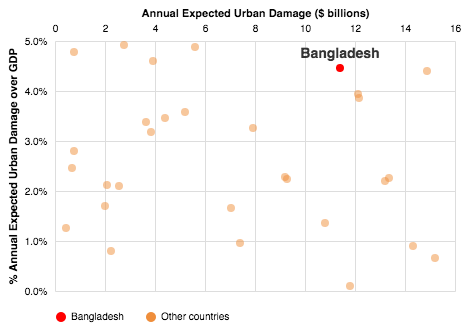

In [25]:
specV3=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 400,
  "height": 250,
  "padding": 5,

  "config": {
    "range": {
      "category": ["red", "#ef8e3b"],
      "symbol": ["square","circle"],
      "opacity": [1,0.5]
      }
  },

  "data": [
    {
      "name": "table",
      "values": [
        {"x": 11.419791263051216, "y": 4.465964521421658,   "label": "Bangladesh"},
        {"x": 15.1938664582494,   "y": 0.6522617325557017,  "label": "country"},
        {"x": 12.109827430710999, "y": 3.933182156027579,   "label": "country"},
        {"x": 12.150300078187009, "y": 3.8646624572981967,  "label": "country"},
        {"x": 7.020171619478667,  "y": 1.668577973782146,   "label": "country"},
        {"x": 11.818590655888418, "y": 0.10687429209741861, "label": "country"},
        {"x": 5.206189614160598,  "y": 3.5816806911651033,  "label": "country"},
        {"x": 3.823492100452132,  "y": 3.179226290036656,   "label": "country"},
        {"x": 9.214108997081162,  "y": 2.2763218007398662,  "label": "country"},
        {"x": 5.600464024368147,  "y": 4.870386316820838,   "label": "country"},
        {"x": 13.190830762662795, "y": 2.2056711726340246,  "label": "country"},
        {"x": 7.911708060970502,  "y": 3.2649894458832396,  "label": "country"},
        {"x": 2.543865751113218,  "y": 2.1066990238014154,  "label": "country"},
        {"x": 2.075837350021734,  "y": 2.1151737518188134,  "label": "country"},
        {"x": 13.353959988090274, "y": 2.251786436991718,   "label": "country"},
        {"x": 3.6243373583560192, "y": 3.37746940121744,    "label": "country"},
        {"x": 4.3824868675682715, "y": 3.45730118257003,    "label": "country"},
        {"x": 10.78070244354892,  "y": 1.3647826347873155,  "label": "country"},
        {"x": 14.305352220886203, "y": 0.9069023565482465,  "label": "country"},
        {"x": 3.9398833337960326, "y": 4.606521059769174,   "label": "country"},
        {"x": 7.418680711658965,  "y": 0.9508803479965833,  "label": "country"},
        {"x": 0.779740719917319,  "y": 2.8023452254936316,  "label": "country"},
        {"x": 2.2562806262151245, "y": 0.7979303640714069,  "label": "country"},
        {"x": 0.4481617274233418, "y": 1.2523387012877285,  "label": "country"},
        {"x": 14.86867303154081,  "y": 4.4048108181898336,  "label": "country"},
        {"x": 9.271841389561791,  "y": 2.232424838364866,   "label": "country"},
        {"x": 0.6706090023088969, "y": 2.464746908252791,   "label": "country"},
        {"x": 0.766632894753041,  "y": 4.785966461672669,   "label": "country"},
        {"x": 1.9878819666261478, "y": 1.6983769501096417,  "label": "country"},
        {"x": 2.7788787096591303, "y": 4.9281828532378995,  "label": "country"}
      ]
    },
    {
      "name": "country_all",
      "source": "table",
      "transform": [
        {
          "type": "filter",
          "expr": "datum['label'] != 'Bangladesh'"
        }
      ]
    },
    {
      "name": "country",
      "source": "table",
      "transform": [
        {
          "type": "filter",
          "expr": "datum['label'] == 'Bangladesh'"
        }
      ]
    },
    {
      "name": "info",
      "values": [
        {"text": "Bangladesh"},
        {"text": "Other countries"}
      ]
    }
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "symbol:mouseover", "update": "datum"},
        {"events": "symbol:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "x",
      "type": "linear",
      "round": true,
      "nice": true,
      "zero": true,
      "domain": {"data": "table", "field": "x"},
      "range": "width"
    },
    {
      "name": "y",
      "type": "linear",
      "round": true,
      "nice": true,
      "zero": true,
      "domain": {"data": "table", "field": "y"},
      "range": "height"
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "info","field": "text"},
      "range": "category"
    }
  ],

  "axes": [
    {
      "scale": "x",
      "grid": true,
      "domain": false,
      "orient": "top",
      "ticks": false,
      "offset": 6,
      "tickCount": 10,
      "title": "Annual Expected Urban Damage ($ billions)"
    },
    {
      "scale": "y",
      "grid": true,
      "domain": false,
      "orient": "left",
      "ticks": false,
      "offset": 6,
      "titlePadding": 5,
      "tickCount": 5,
      "title": "% Annual Expected Urban Damage over GDP",
      "encode":{
        "labels":{
          "update":{
            "text":{"signal": "format(datum.value, '.1f') + '%'"}
          }
        }
      }
    }
  ],

  "legends": [
    {
      "fill":"color",
      "direction": "horizontal",
      "orient": "bottom",
      "offset": 20,
      "columnPadding":20,
      "labelLimit": 1000,
      "encode": {
        "symbols": {
          "update": {
            "fillOpacity": {"value": 1}
          }
        }
      }
    }
  ],


  "marks": [
    {
      "name": "points",
      "type": "symbol",
      "from": {"data": "country_all"},
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "x"},
          "y": {"scale": "y", "field": "y"},
          "shape": {"value": "circle"},
          "width": {"value": 2},
          "opacity": {"value": 1},
          "fill": {"value": "#ef8e3b"}
        },
        "update": {
          "fillOpacity": {"value": 0.5}
        },
        "hover": {
          "fillOpacity": {"value": 1}
        }
      }
    },
    {
      "name": "point",
      "type": "symbol",
      "from": {"data": "country"},
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "x"},
          "y": {"scale": "y", "field": "y"},
          "shape": {"value": "circle"},
          "width": {"value": 2},
          "opacity": {"value": 1},
          "fill": {"value": "red"}
        }
      }
    },
    {
      "name": "label",
      "type": "text",
      "from": {"data": "country"},
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "x"},
          "y": {"scale": "y", "field": "y", "offset": -7},
          "fill": {"value": "#333"},
          "fontSize": {"value": 14},
          "fontWeight": {"value": "bold"},
          "text": {"field": "label"},
          "align": {"value": "center"},
          "baseline": {"value": "bottom"}
        }
      }
    },
    {
      "name": "labels",
      "type": "text",
      "from": {"data": "country"},
      "encode": {
        "enter": {
          "fill": {"value": "#333"},
          "fontSize": {"value": 14},
          "fontWeight": {"value": "bold"},
          "text": {"field": "label"},
          "align": {"value": "center"},
          "baseline": {"value": "bottom"}
        },
        "update": {
          "x": {"scale": "x", "signal": "tooltip.x"},
          "y": {"scale": "y", "signal": "tooltip.y", "offset": -7},
          "text": {"signal": "tooltip.label"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
}
""")
vega4view=dict(specV3)
Vega(vega4view)

## Probability of flood damage to Urban

In [126]:
df = pd.read_csv('./data/risk_lp-curve.csv')

In [30]:
df.head()

,Unnamed: 0,lp_95_2030_rp00001,lp_95_2030_rp00002,lp_95_2030_rp00005,lp_95_2030_rp00010,lp_95_2030_rp00025,lp_95_2030_rp00050,lp_95_2030_rp00100,lp_95_2030_rp00250,lp_95_2030_rp00500,...,lp_05_2080_rp00001,lp_05_2080_rp00002,lp_05_2080_rp00005,lp_05_2080_rp00010,lp_05_2080_rp00025,lp_05_2080_rp00050,lp_05_2080_rp00100,lp_05_2080_rp00250,lp_05_2080_rp00500,lp_05_2080_rp01000
0,"The City of Buenos Aires, Argentina",8.145515e+07,8.654705e+07,9.913700e+07,1.094808e+08,1.225501e+08,1.351230e+08,1.485224e+08,1.637730e+08,1.751380e+08,...,4.498374e+08,4.734167e+08,5.304083e+08,5.652853e+08,6.076248e+08,6.390346e+08,6.702126e+08,7.101858e+08,7.395820e+08,7.778741e+08


In [31]:
a = ['2030_rp00001', '2030_rp00002', '2030_rp00005', '2030_rp00010', '2030_rp00025', '2030_rp00050', '2030_rp00100', '2030_rp00250', '2030_rp00500', '2030_rp01000']

In [73]:
value_05 = []
value_50 = []
value_95 = []
for i in a:
    value_05.append(df['lp_05_'+i][0])
    value_50.append(df['lp_50_'+i][0])
    value_95.append(df['lp_95_'+i][0])
value_05 = np.array(value_05)*1e-6  
value_05 = value_05[::-1]   
value_50 = np.array(value_50)*1e-6  
value_50 = value_50[::-1]
value_95 = np.array(value_95)*1e-6  
value_95 = value_95[::-1]

In [74]:
x = np.array([0.1,0.2,0.5,1,2.5,5,10,25,50,100])

In [90]:
for i in range(len(value_05)):
    print({"x":x[i],"y":value_05[i], "c":"05"},',')
for i in range(len(value_50)):
    print({"x":x[i],"y":value_50[i], "c":"50"},',')
for i in range(len(value_95)):
    print({"x":x[i],"y":value_95[i], "c":"95"},',')

{'x': 0.1, 'y': 158.14655244999997, 'c': '05'} ,
{'x': 0.2, 'y': 146.294477616, 'c': '05'} ,
{'x': 0.5, 'y': 132.973092707, 'c': '05'} ,
{'x': 1.0, 'y': 118.168053657, 'c': '05'} ,
{'x': 2.5, 'y': 108.54401577899999, 'c': '05'} ,
{'x': 5.0, 'y': 98.8484253729, 'c': '05'} ,
{'x': 10.0, 'y': 88.34589741519999, 'c': '05'} ,
{'x': 25.0, 'y': 80.0492638105, 'c': '05'} ,
{'x': 50.0, 'y': 67.51822895849999, 'c': '05'} ,
{'x': 100.0, 'y': 62.4263212814, 'c': '05'} ,
{'x': 0.1, 'y': 169.84105801700002, 'c': '50'} ,
{'x': 0.2, 'y': 158.484290937, 'c': '50'} ,
{'x': 0.5, 'y': 146.66566623299997, 'c': '50'} ,
{'x': 1.0, 'y': 129.02326864, 'c': '50'} ,
{'x': 2.5, 'y': 118.321696977, 'c': '50'} ,
{'x': 5.0, 'y': 108.62610657100001, 'c': '50'} ,
{'x': 10.0, 'y': 95.5567393202, 'c': '50'} ,
{'x': 25.0, 'y': 87.8992342836, 'c': '50'} ,
{'x': 50.0, 'y': 75.3681994316, 'c': '50'} ,
{'x': 100.0, 'y': 70.2762917546, 'c': '50'} ,
{'x': 0.1, 'y': 186.49477245299997, 'c': '95'} ,
{'x': 0.2, 'y': 175.138005373

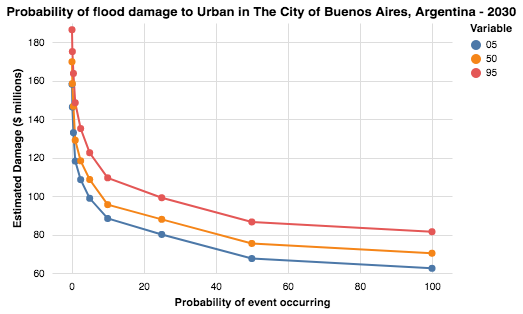

In [93]:
specV3=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 400,
  "height": 250,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {"x": 0.1,   "y": 158.14655244999997, "c": "05"},
        {"x": 0.2,   "y": 146.294477616,      "c": "05"},
        {"x": 0.5,   "y": 132.973092707,      "c": "05"},
        {"x": 1.0,   "y": 118.168053657,      "c": "05"},
        {"x": 2.5,   "y": 108.54401577899999, "c": "05"},
        {"x": 5.0,   "y": 98.8484253729,      "c": "05"},
        {"x": 10.0,  "y": 88.34589741519999,  "c": "05"},
        {"x": 25.0,  "y": 80.0492638105,      "c": "05"},
        {"x": 50.0,  "y": 67.51822895849999,  "c": "05"},
        {"x": 100.0, "y": 62.4263212814,      "c": "05"},
        {"x": 0.1,   "y": 169.84105801700002, "c": "50"},
        {"x": 0.2,   "y": 158.484290937,      "c": "50"},
        {"x": 0.5,   "y": 146.66566623299997, "c": "50"},
        {"x": 1.0,   "y": 129.02326864,       "c": "50"},
        {"x": 2.5,   "y": 118.321696977,      "c": "50"},
        {"x": 5.0,   "y": 108.62610657100001, "c": "50"},
        {"x": 10.0,  "y": 95.5567393202,      "c": "50"},
        {"x": 25.0,  "y": 87.8992342836,      "c": "50"},
        {"x": 50.0,  "y": 75.3681994316,      "c": "50"},
        {"x": 100.0, "y": 70.2762917546,      "c": "50"},
        {"x": 0.1,   "y": 186.49477245299997, "c": "95"},
        {"x": 0.2,   "y": 175.138005373,      "c": "95"},
        {"x": 0.5,   "y": 163.773043097,      "c": "95"},
        {"x": 1.0,   "y": 148.52235802899997, "c": "95"},
        {"x": 2.5,   "y": 135.122993721,      "c": "95"},
        {"x": 5.0,   "y": 122.550142057,      "c": "95"},
        {"x": 10.0,  "y": 109.480774807,      "c": "95"},
        {"x": 25.0,  "y": 99.13699789820001,  "c": "95"},
        {"x": 50.0,  "y": 86.54705311149999,  "c": "95"},
        {"x": 100.0, "y": 81.45514543440001,  "c": "95"}
      ]
    }
  ],

  "scales": [
    {
      "name": "x",
      "type": "linear",
      "range": "width",
      "padding": 20,
      "domain": {"data": "table", "field": "x"}
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true,
      "zero": false,
      "domain": {"data": "table", "field": "y"}
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": {"data": "table", "field": "c"}
    }
  ],

  "title": "Probability of flood damage to Urban in The City of Buenos Aires, Argentina - 2030",

  "axes": [
    {"orient": "bottom", "scale": "x","domain": false, "ticks": false, "grid": true, "offset": 6, "tickCount": 4, "title": "Probability of event occurring"},
    {"orient": "left", "scale": "y","domain": false, "ticks": false, "grid": true, "offset": 6, "tickCount": 6, "title": "Estimated Damage ($ millions)"}
  ],

  "legends": [
    {
      "title": "Variable",
      "fill": "color",
      "orient": "right"
    }
  ],

  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series",
          "data": "table",
          "groupby": "c"
        }
      },
      "marks": [
        {
          "type": "line",
          "from": {"data": "series"},
          "encode": {
            "enter": {
              "x": {"scale": "x", "field": "x"},
              "y": {"scale": "y", "field": "y"},
              "stroke": {"scale": "color", "field": "c"},
              "strokeWidth": {"value": 2}
            }
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series",
          "data": "table",
          "groupby": "c"
        }
      },
      "marks": [
        {
          "type": "symbol",
          "from": {"data": "series"},
          "encode": {
            "enter": {
              "x": {"scale": "x", "field": "x"},
              "y": {"scale": "y", "field": "y"},
              "fill": {"scale": "color", "field": "c"},
              "size": {"value": 50}
            }
          }
        }
      ]
    }
  ]
}
""")
vega4view=dict(specV3)
Vega(vega4view)

## Annual damage and impact drivers

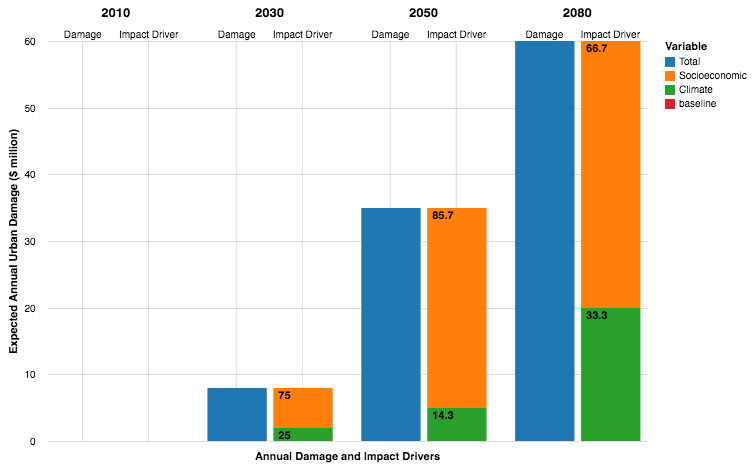

In [125]:
specV3=json.loads("""
{
  "width": 600,
  "height": 400,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {"year":"2010", "variable":"Damage", "value":0, "type": "Total", "percentage": []},
        {"year":"2010", "variable":"Impact Driver", "value":0, "type": "Socioeconomic", "percentage": []},
        {"year":"2010", "variable":"Impact Driver", "value":0, "type": "Climate", "percentage": []},
        {"year":"2010", "variable":"Impact Driver", "value":0, "type": "baseline", "percentage": []},
        {"year":"2030", "variable":"Damage", "value":8, "type": "Total", "percentage": []},
        {"year":"2030", "variable":"Impact Driver", "value":6, "type": "Socioeconomic", "percentage": 75},
        {"year":"2030", "variable":"Impact Driver", "value":2, "type": "Climate", "percentage": 25},
        {"year":"2030", "variable":"Impact Driver", "value":0, "type": "baseline", "percentage": []},
        {"year":"2050", "variable":"Damage", "value":35, "type": "Total", "percentage": []},
        {"year":"2050", "variable":"Impact Driver", "value":30, "type": "Socioeconomic", "percentage": 85.7},
        {"year":"2050", "variable":"Impact Driver", "value":5, "type": "Climate",  "percentage": 14.3},
        {"year":"2050", "variable":"Impact Driver", "value":0, "type": "baseline", "percentage": []},
        {"year":"2080", "variable":"Damage", "value":60, "type": "Total", "percentage": []},
        {"year":"2080", "variable":"Impact Driver", "value":40, "type": "Socioeconomic", "percentage": 66.7},
        {"year":"2080", "variable":"Impact Driver", "value":20, "type": "Climate", "percentage": 33.3},
        {"year":"2080", "variable":"Impact Driver", "value":0, "type": "baseline", "percentage": []}
      ],
      "transform": [
        {
          "type": "stack",
          "groupby": ["year", "variable"],
          "sort": {"field": "type"},
          "field": "value"
        }
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "year"},
      "range": "width",
      "padding": 0.0,
      "paddingInner": 0.1
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {"data": "table", "field": "y1"},
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "table", "field": "type"},
      "range": {"scheme": "category10"}
    }
  ],

  "axes": [
    {
      "orient": "top", 
      "scale": "xscale", 
      "domain": false, 
      "ticks": false, 
      "offset": 20, 
      "labelFontWeight": "bold", 
      "labelFontSize": 13
    },
    {
      "orient": "bottom", 
      "scale": "xscale", 
      "domain": false, 
      "ticks": false, 
      "labels":false, 
      "offset": 5, 
      "title": "Annual Damage and Impact Drivers"
    },
    {
      "orient": "left", 
      "scale": "yscale", 
      "domain": false, 
      "ticks": false, 
      "grid":true, 
      "offset": 10, 
      "tickCount": 5, 
      "title": "Expected Annual Urban Damage ($ million)"}
  ],

  "legends": [
    {
      "title": "Variable",
      "fill": "color",
      "orient": "right",
      "encode": {
        "symbols": {
          "update": {
            "strokeWidth": {"value": 0},
            "opacity": {"value": 1},
            "shape": {"value": "square"}
          }
        }
      }
    }
  ],

  "marks": [
    {
      "type": "group",

      "from": {
        "facet": {
          "data": "table",
          "name": "facet",
          "groupby": "year"
        }
      },

      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "year"}
        }
      },

      "signals": [
        {"name": "width", "update": "bandwidth('xscale')"}
      ],

      "scales": [
        {
          "name": "pos",
          "type": "band",
          "domain": {"data": "facet", "field": "variable"},
          "range": "width",
          "padding": 0.1
        }
      ],

      "axes": [
        {"orient": "top", "scale": "pos", "domain": false, "ticks": false, "grid": true, "offset": 0}
      ],

      "marks": [
        {
          "name": "bars",
          "from": {"data": "facet"},
          "type": "rect",
          "encode": {
            "enter": {
              "x": {"scale": "pos", "field": "variable"},
              "width": {"scale": "pos", "band": 1},
              "y": {"scale": "yscale", "field": "y0"},
              "y2": {"scale": "yscale", "field": "y1"},
              "fill": {"scale": "color", "field": "type"}
            }
          }
        },
        {
          "type": "text",
          "from": {"data": "bars"},
          "encode": {
            "enter": {
              "y": {"field": "y", "offset": 8},
              "x": {"field": "x", "offset": 5},
              "fill": {"value": "#000"},
              "fontWeight": {"value": "bold"},
              "align": {"value": "top"},
              "baseline": {"value": "middle"},
              "text": {"field": "datum.percentage"}
            }
          }
        }
      ]
    }
  ]
}
""")
vega4view=dict(specV3)
Vega(vega4view)